# SC2001/CE2101/CZ2101 Algorithm Design and Analysis  
## Project 1: Integration of Mergesort & Insertion Sort  

**Group Members:**  
- Bui Dang Nguyen  
- Toh Kok Soon  
- Ammamalai Ramesh Santhosh Kumar
- Bose Samrath

---

# Abstract


---

# Introduction


---

# Methodology
- Algorithm design (hybrid mergesort with threshold S)
- Input data generation (random arrays 1k → 10M)
- Experimental setup (Cpu, Python, C++, number of runs, etc.)

## Experimental Setup

To evaluate the performance of the hybrid Mergesort–Insertion Sort algorithm, we conducted systematic experiments under controlled conditions. The parameters are as follows:

- **Input Sizes (n):**  
  `1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000, 256000, 512000, 1024000, 2048000, 4096000, 8192000, 10000000`

  This exponential progression ensures coverage from small to large-scale inputs, up to 10 million elements. We chose to double the input sizes each time as it provides a balance between having a substantial amount of data points and total runtime.

- **Input Data Generation:**

  To generate the data, we made a function to create a dynamic array of size **n**, filling it up with random numbers from 1 to 10 million.

  To improve the fairness when comparing the algorithms, we were able to pass a seed to the random number generator, this ensures that the array fed to the algorithm at each input size remain the same.

- **Threshold Values (S):**  
  `2, 4, 8, 16, 32, 64, 128, 256, 512, 1024`
  
  These thresholds span from very small to relatively large subarray sizes, enabling identification of the optimal cutoff empirically.

- **Performance Metric:**  
  The metric we used to benchmark our algorithms are:
    *   **Number of Key Comparisons** - provides a machine-independent assessment of efficiency.
    *   **Execution Time** - provide insight on real performance

- **Repetition and Averaging:**  
  Each algorithm was repeated **10 times**, and the **average execution time** was recorded to minimize fluctuations and ensure stability.

- **Algorithms Benchmarked:**
    1. Recursive Merge Sort
    2. Iterative Merge Sort
    3. Recursive Hybrid Sort (on different chunk sizes S)
    4. Iterative Hybrid Sort (on different chunk sizes S)

- **Evaluation Procedure:**  
  1. Generate array of size n
  2. Run algorithms on the array (with different chunk sizes **S** for hybrid algorithm)
  3. Outputs the result to CSV file (Data Length, Chunk Size, Time, Comparison Count)
  4. Analyse result with Excel
  5. Empirical results were compared against the theoretical $O(n \cdot \log_2 n)$ complexity of Mergesort.  
  6. Trends were analyzed to determine the optimal threshold value **S**, balancing recursive overhead and Insertion Sort efficiency.


# Implementation

In [ ]:
#include "iterative_hybrid_sort.hpp"
#include <cstring>
#include <algorithm>
#include <functional>
using namespace std::chrono;

inline void insertionSort(CountableInt* arr, int left, int right) {
    for (int i = left + 1; i < right; ++i) {
        CountableInt key = arr[i];
        int j = i - 1;
        while (j >= left && arr[j] > key) {
            arr[j + 1] = arr[j];
            --j;
        }
        arr[j + 1] = key;
    }
}

void mergeSortRec(int l, int r, int S, CountableInt* pa, CountableInt* pb) {
    if (r - l <= S) {
        insertionSort(pa, l, r);
        return;
    }
    int mid = l + (r - l) / 2;
    mergeSortRec(l, mid, S, pa, pb);
    mergeSortRec(mid, r, S, pa, pb);
    int i = l, j = mid, k = l;
    while (i < mid && j < r) {
        if (pa[i] <= pa[j]) pb[k++] = pa[i++];
        else pb[k++] = pa[j++];
    }
    if (i < mid) memcpy(pb + k, pa + i, (mid - i) * sizeof(CountableInt));
    if (j < r) memcpy(pb + k, pa + j, (r - j) * sizeof(CountableInt));
    memcpy(pa + l, pb + l, (r - l) * sizeof(CountableInt));
};

Result recursiveHybridSort(int S, int n, std::vector<CountableInt>& a) {
    std::vector<CountableInt> b(n);
    memcpy(b.data(), a.data(), n * sizeof(CountableInt));
    CountableInt* pa = a.data();
    CountableInt* pb = b.data();

    auto start = high_resolution_clock::now();

    mergeSortRec(0, n, S, pa, pb);

    auto end = high_resolution_clock::now();
    auto elapsedMicroseconds = duration_cast<microseconds>(end - start).count();
    return Result{ static_cast<int>(elapsedMicroseconds), comparisonCount };
}

# Theoretical Analysis of Time Complexity

##**1. Worst-case Complexity**

For simplicity, we assume $n$ is a power of 2 (i.e. $n = 2 ^ k$).

Let $W(n)$ be the time needed to sort a sequence of length $n$.

We consider the complexity in 2 phases:

###1.1. Phase 1: Merge Sort
\begin{align*}
    W(n) &= W(\frac{n}{2}) + W(\frac{n}{2}) + n - 1 \\
    W(2^k) &= 2 \cdot W(2 ^ {k - 1}) + 2^k - 1 \\
    &= 2 \cdot (2 \cdot W(2 ^ {k - 2}) + 2^{k - 1} - 1) \\
    &= 2^2 \cdot W(2 ^ {k - 2}) + 2^k - 2 + 2^k - 1 \\
    &= 2^3 \cdot W(2 ^ {k - 3}) + 3 \cdot 2^k - (1 + 2 + 2^2) \\
    &\cdots \\
    &= 2^x \cdot W(2 ^ {k - x}) + x \cdot 2^k - (1 + 2 + \ldots + 2^{x - 1})
\end{align*}

Substituting $x$ with $k - \log_2S$, we get:

\begin{align*}
    W(2 ^ k) &= 2 ^ {k - \log_2S} \cdot W(2 ^ {k - (k - \log_2S)}) + (k - \log_2S) \cdot 2^k - (1 + 2 + \ldots + 2^{k - \log_2S - 1}) \\
    &= \frac{2^k}{2^{\log_2S}} \cdot W(2 ^ {\log_2S}) + (k - \log_2{S}) \cdot 2^k - (2 ^ {k - \log_2{S}} - 1) \\
    W(n) &= \frac{n}{S} \cdot W(S) + n \cdot (\log_2n - \log_2S) - (\frac{n}{S} - 1)
\end{align*}

###1.2. Phase 2: Insertion Sort
Worst case complexity of insertion sort for a sequence of length $S$ is well-known: $W(S) = \frac{S \cdot (S - 1)}{2}$.

###1.3. Adding it all up
Substituting $W(S) = \frac{S \cdot (S - 1)}{2}$ into the complexity analysis for Phase 1, we get:

\begin{align*}
    W(n) &= \frac{n}{S} \cdot \frac{S \cdot (S - 1)}{2} + n \cdot (\log_2n - \log_2S) - (\frac{n}{S} - 1) \\
    &= \frac{n \cdot (S - 1)}{2} + n \cdot \log_2\frac{n}{S} - (\frac{n}{S} - 1)\\
    &= O(n \cdot S + n \cdot \log_2\frac{n}{S}).
\end{align*}

##**2. Average-case Complexity**
Again, we let $W(n)$ be the time needed to sort a sequence of length $n$, and consider the complexity in 2 phases:

###2.1. Phase 1: Merge Sort
\begin{align*}
    W(n) &= W(\frac{n}{2}) + W(\frac{n}{2}) + const \cdot n \\
    &\cdots \\
    &= \frac{n}{S} \cdot W(S) + const \cdot n \cdot (\log_2n - \log_2S)
\end{align*}

###2.2. Phase 2: Insertion Sort
Average case complexity of insertion sort for a sequence of length $S$ is also well-known: $W(S) = \frac{S ^ 2}{4} + O(S)$.

###2.3. Adding it all up
Substituting $W(S) = \frac{(S - 1) \cdot (S + 2)}{4}$ into the complexity analysis for Phase 1, we get:

\begin{align*}
    W(n) &= \frac{n}{S} \cdot (\frac{S ^ 2}{4} + O(S)) + const \cdot n \cdot (\log_2n - \log_2S) \\
    &= O(n \cdot S + n \cdot \log_2\frac{n}{S}).
\end{align*}

---

# Experimental Chunk Sizes
The algorithm was tested with the following threshold values of **S**:  
`2, 4, 8, 16, 32, 64, 128, 256, 512, 1024`

---

# Expected Empirical Validation
The number of key comparisons should follow the theoretical trends above. In practice:

- With **low fixed S**, comparisons grow approximately as Θ(n log n).  
- With **increasing S**, performance improves until the optimal S is reached, beyond which comparisons rise sharply due to insertionSort overhead.

> Graph: Comparison count of HybridSort against data length


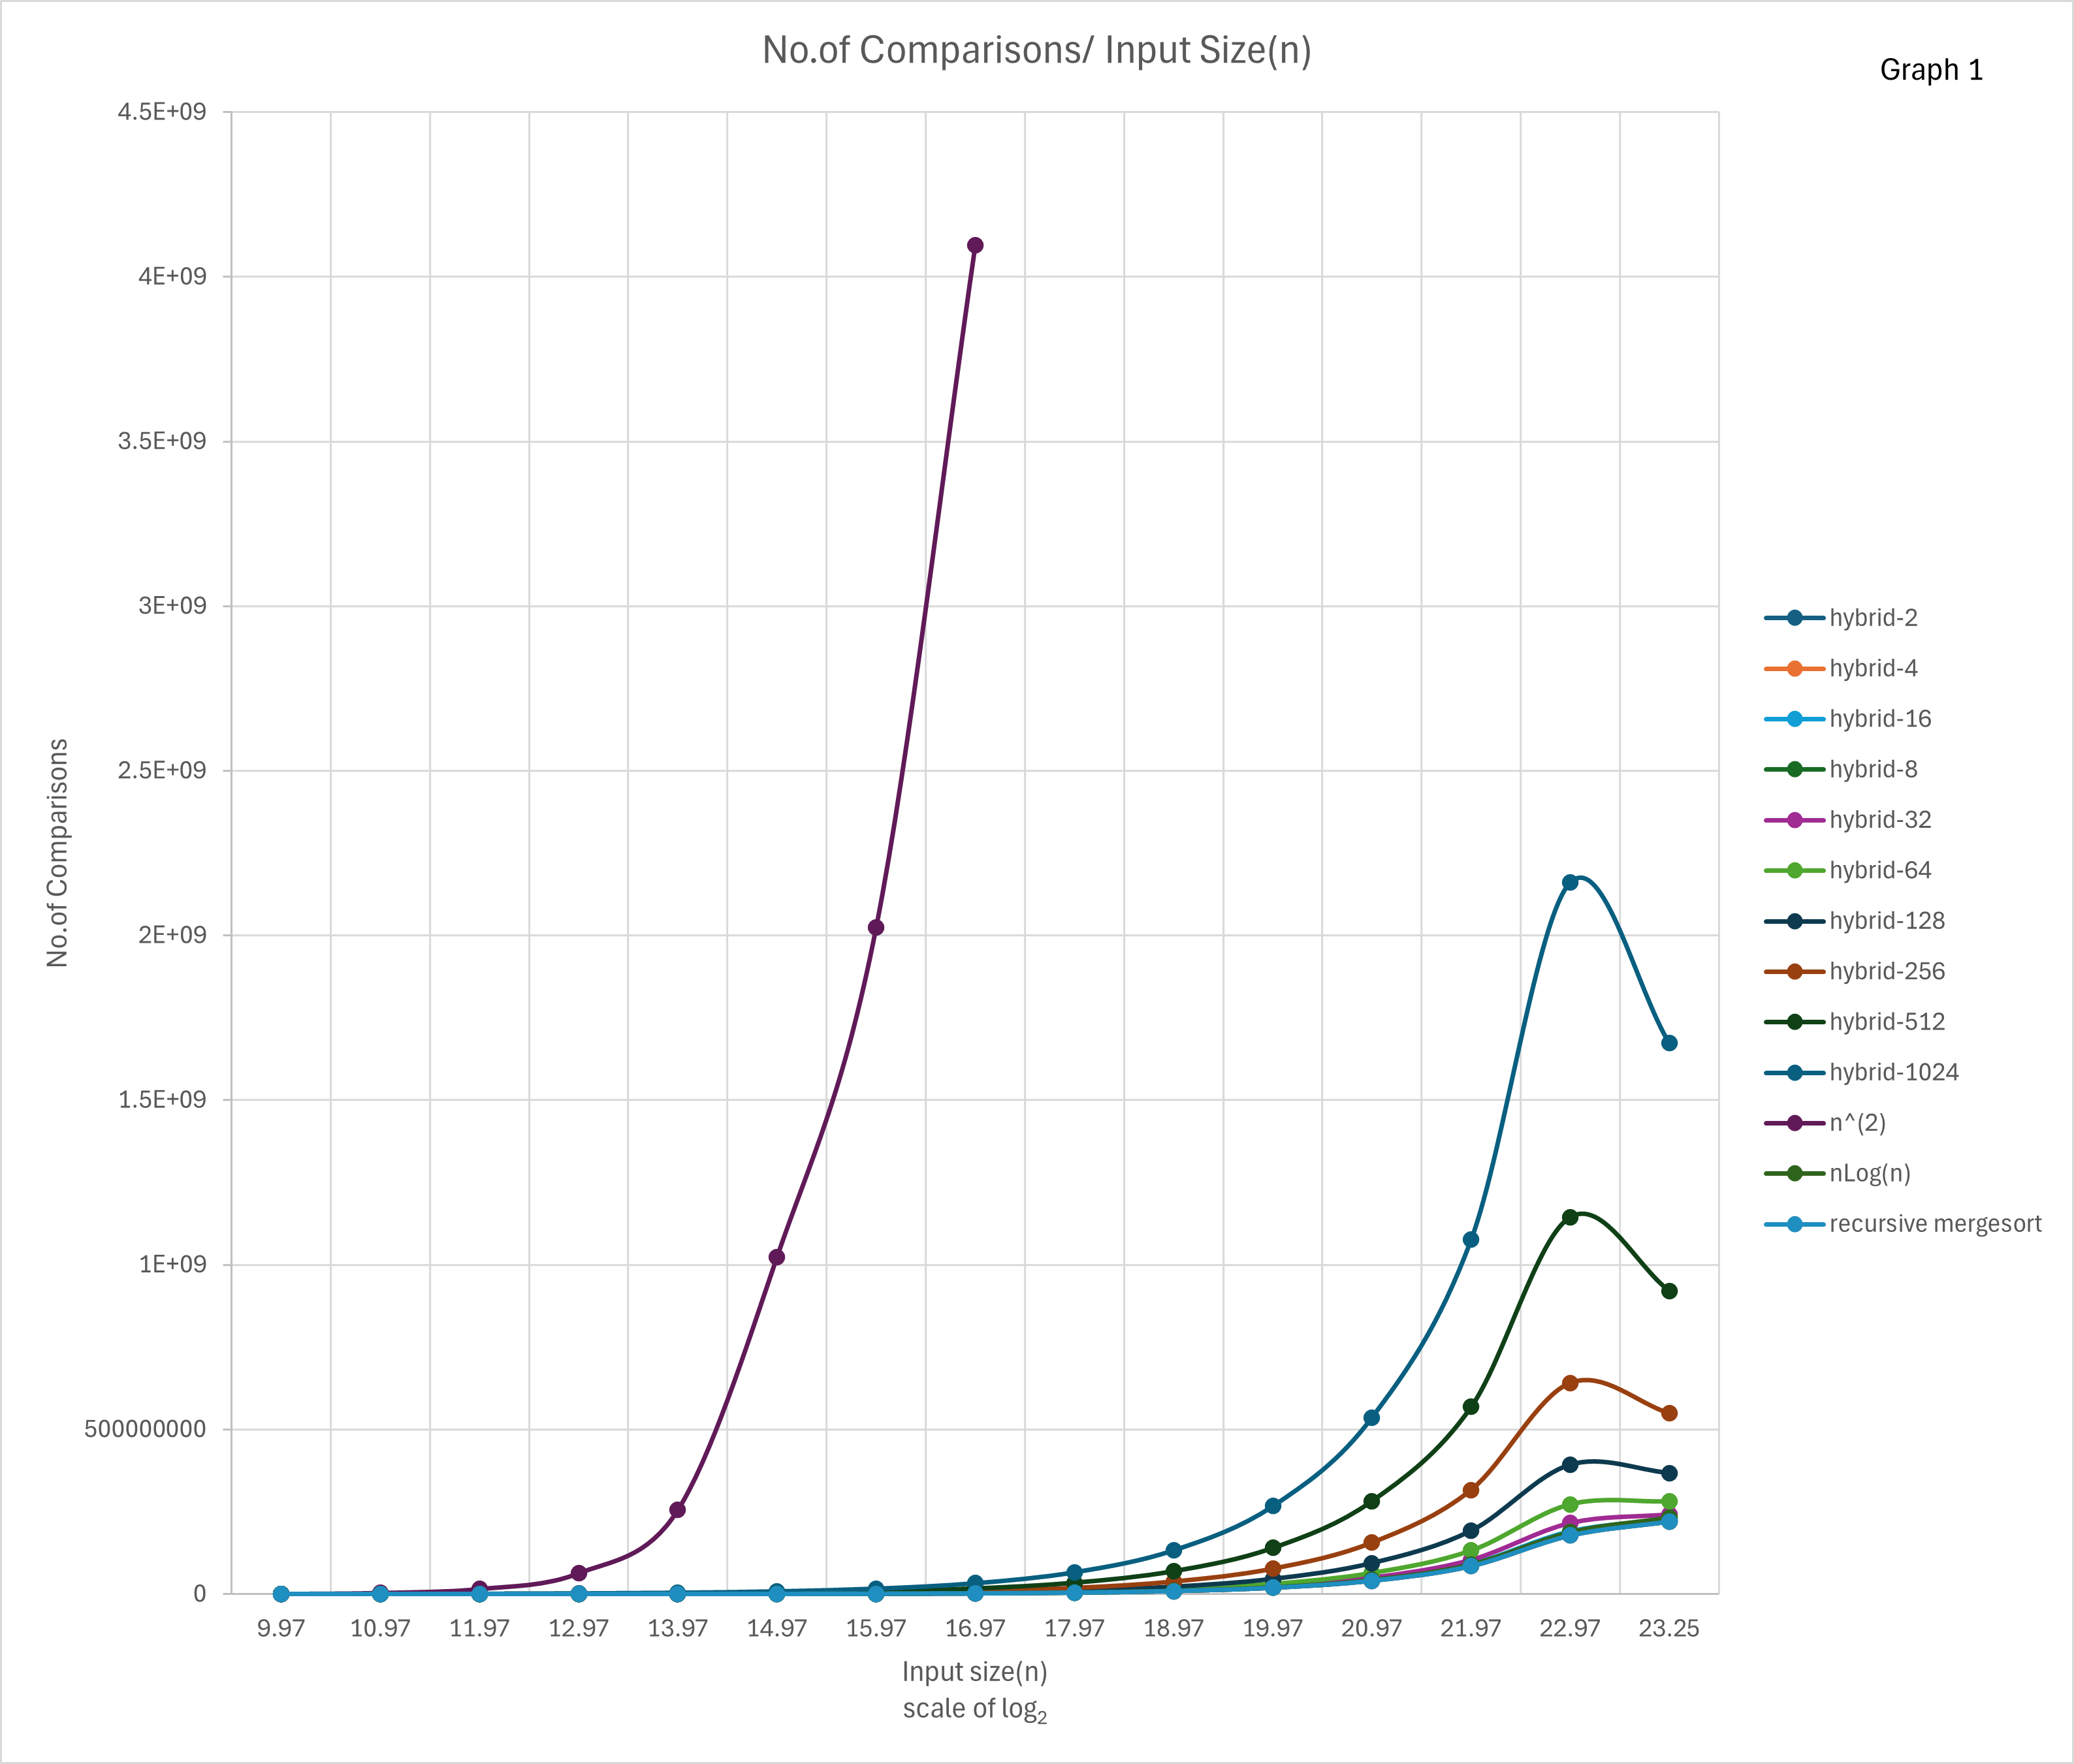

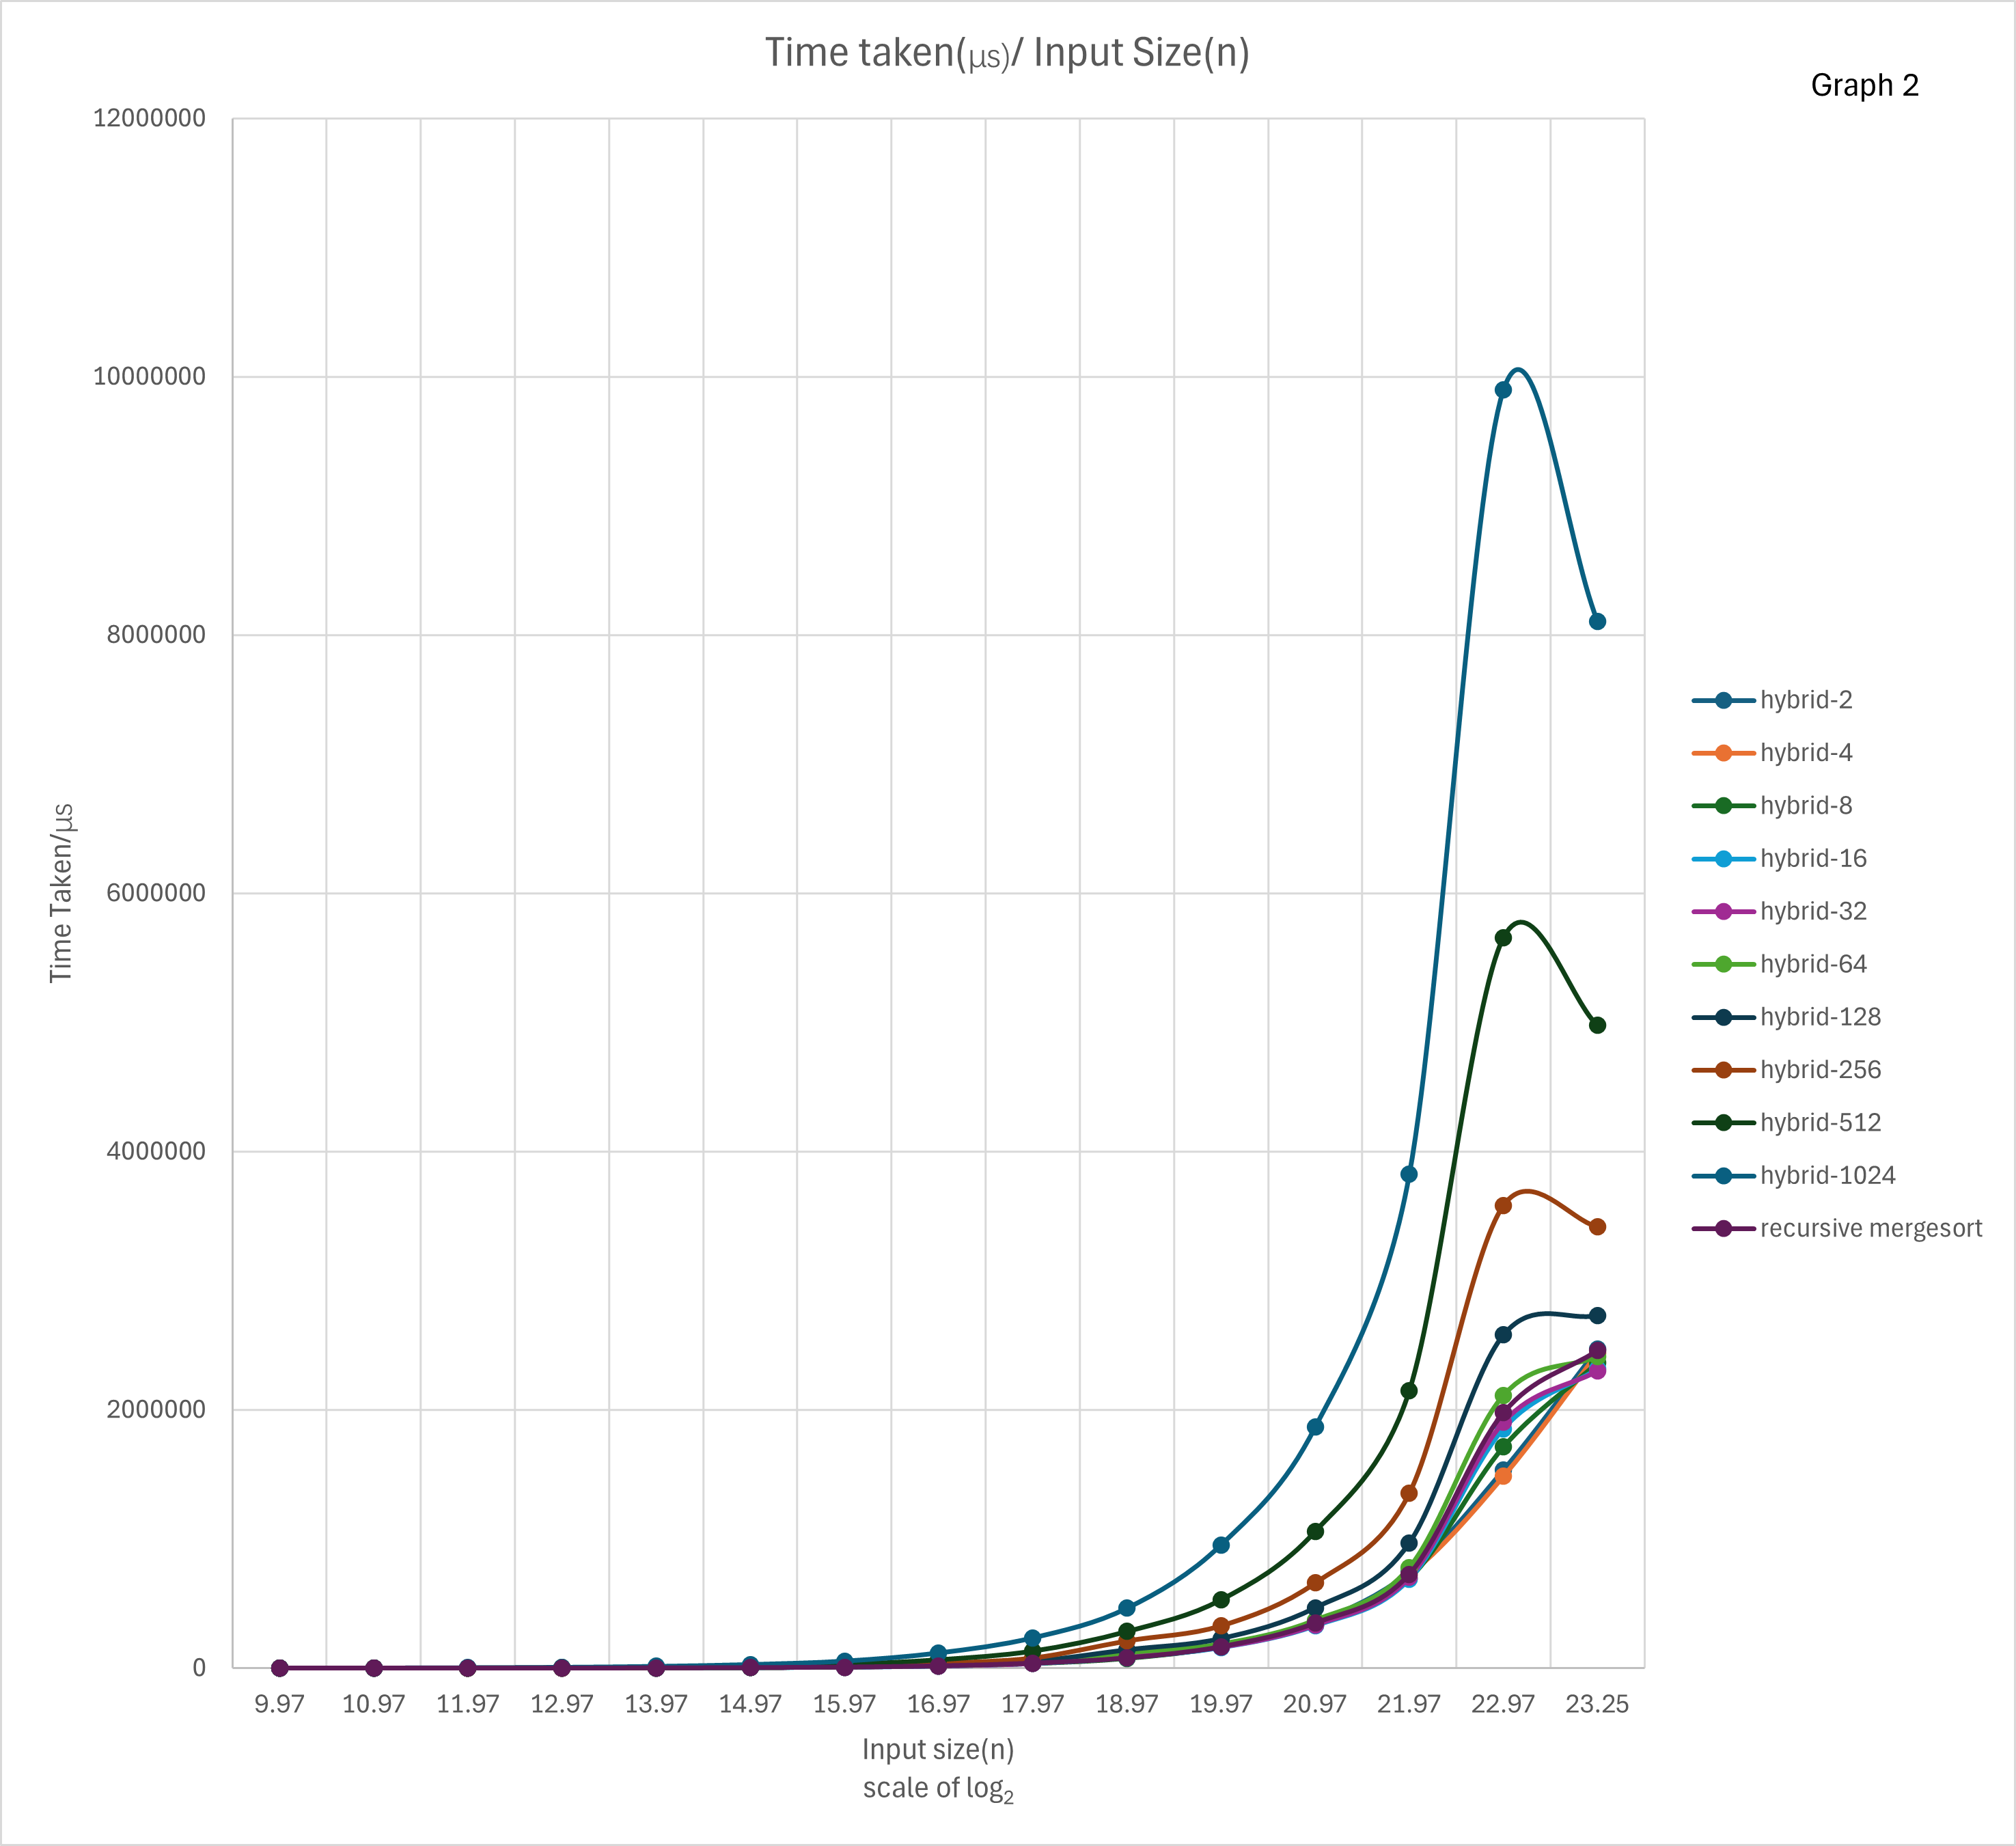

## Empirical Observations of Graphs 1 and 2

- **Overall Growth Trend:**  
  * As **n** increases, the number of comparisons in HybridSort grows super-linearly, consistent with the theoretical complexity of Θ(n log n). On the logarithmic x-axis, the empirical results confirm this expected behavior.
  * We also noticed a drop at 10 million for comparison count and time needed to execute, this drop is especially prominent on larger chunk sizes. This is due to the nature of the input size and how the algorithm work, the data is not wrong.

- **Effect of Threshold (S):**  
  - Larger values of **S** shift the curve upward, as more comparisons are introduced by the increased reliance on Insertion Sort.  
  - Smaller values of **S** shift the curve downward, as more subarrays are handled by MergeSort, reducing insertion overhead but increasing recursive work.

- **Validation of Theory:**  
  These results validate the theoretical complexity of HybridSort:  
  $Θ(n \cdot \log_2(n/S) + n \cdot S)$
  
  The balance between merge and insertion work is clearly reflected in the empirical trends.

## Theoretical Analysis of Comparisons vs Threshold S

Based on the earlier analysis, the complexity of the **HybridSort()** algorithm can be expressed as:  

$Θ(n \cdot \log_2(n/S) + n \cdot S)$

When the **input size (n) is fixed**, we analyze how the number of key comparisons varies as the threshold **S** changes.

- **For small values of S:**  
  The **merge term**, $\log_2(n/S)$, dominates due to the larger number of recursive calls in mergeSort.  
  → This results in higher costs initially.

- **For larger values of S:**  
  The **insertion term**, $n \cdot S$, dominates as Insertion Sort begins handling larger subarrays.  
  → This causes the cost to rise significantly.

- **Expected Curve Shape:**  
  In theory, the curve of comparisons vs threshold **S** should be **U-shaped**:  
  - Initially, comparisons decrease slightly as small increases in **S** reduce recursive calls.  
  - Beyond the optimal point, comparisons increase steeply once the $n \cdot S$ term starts dominating due to the growing insertion overhead.

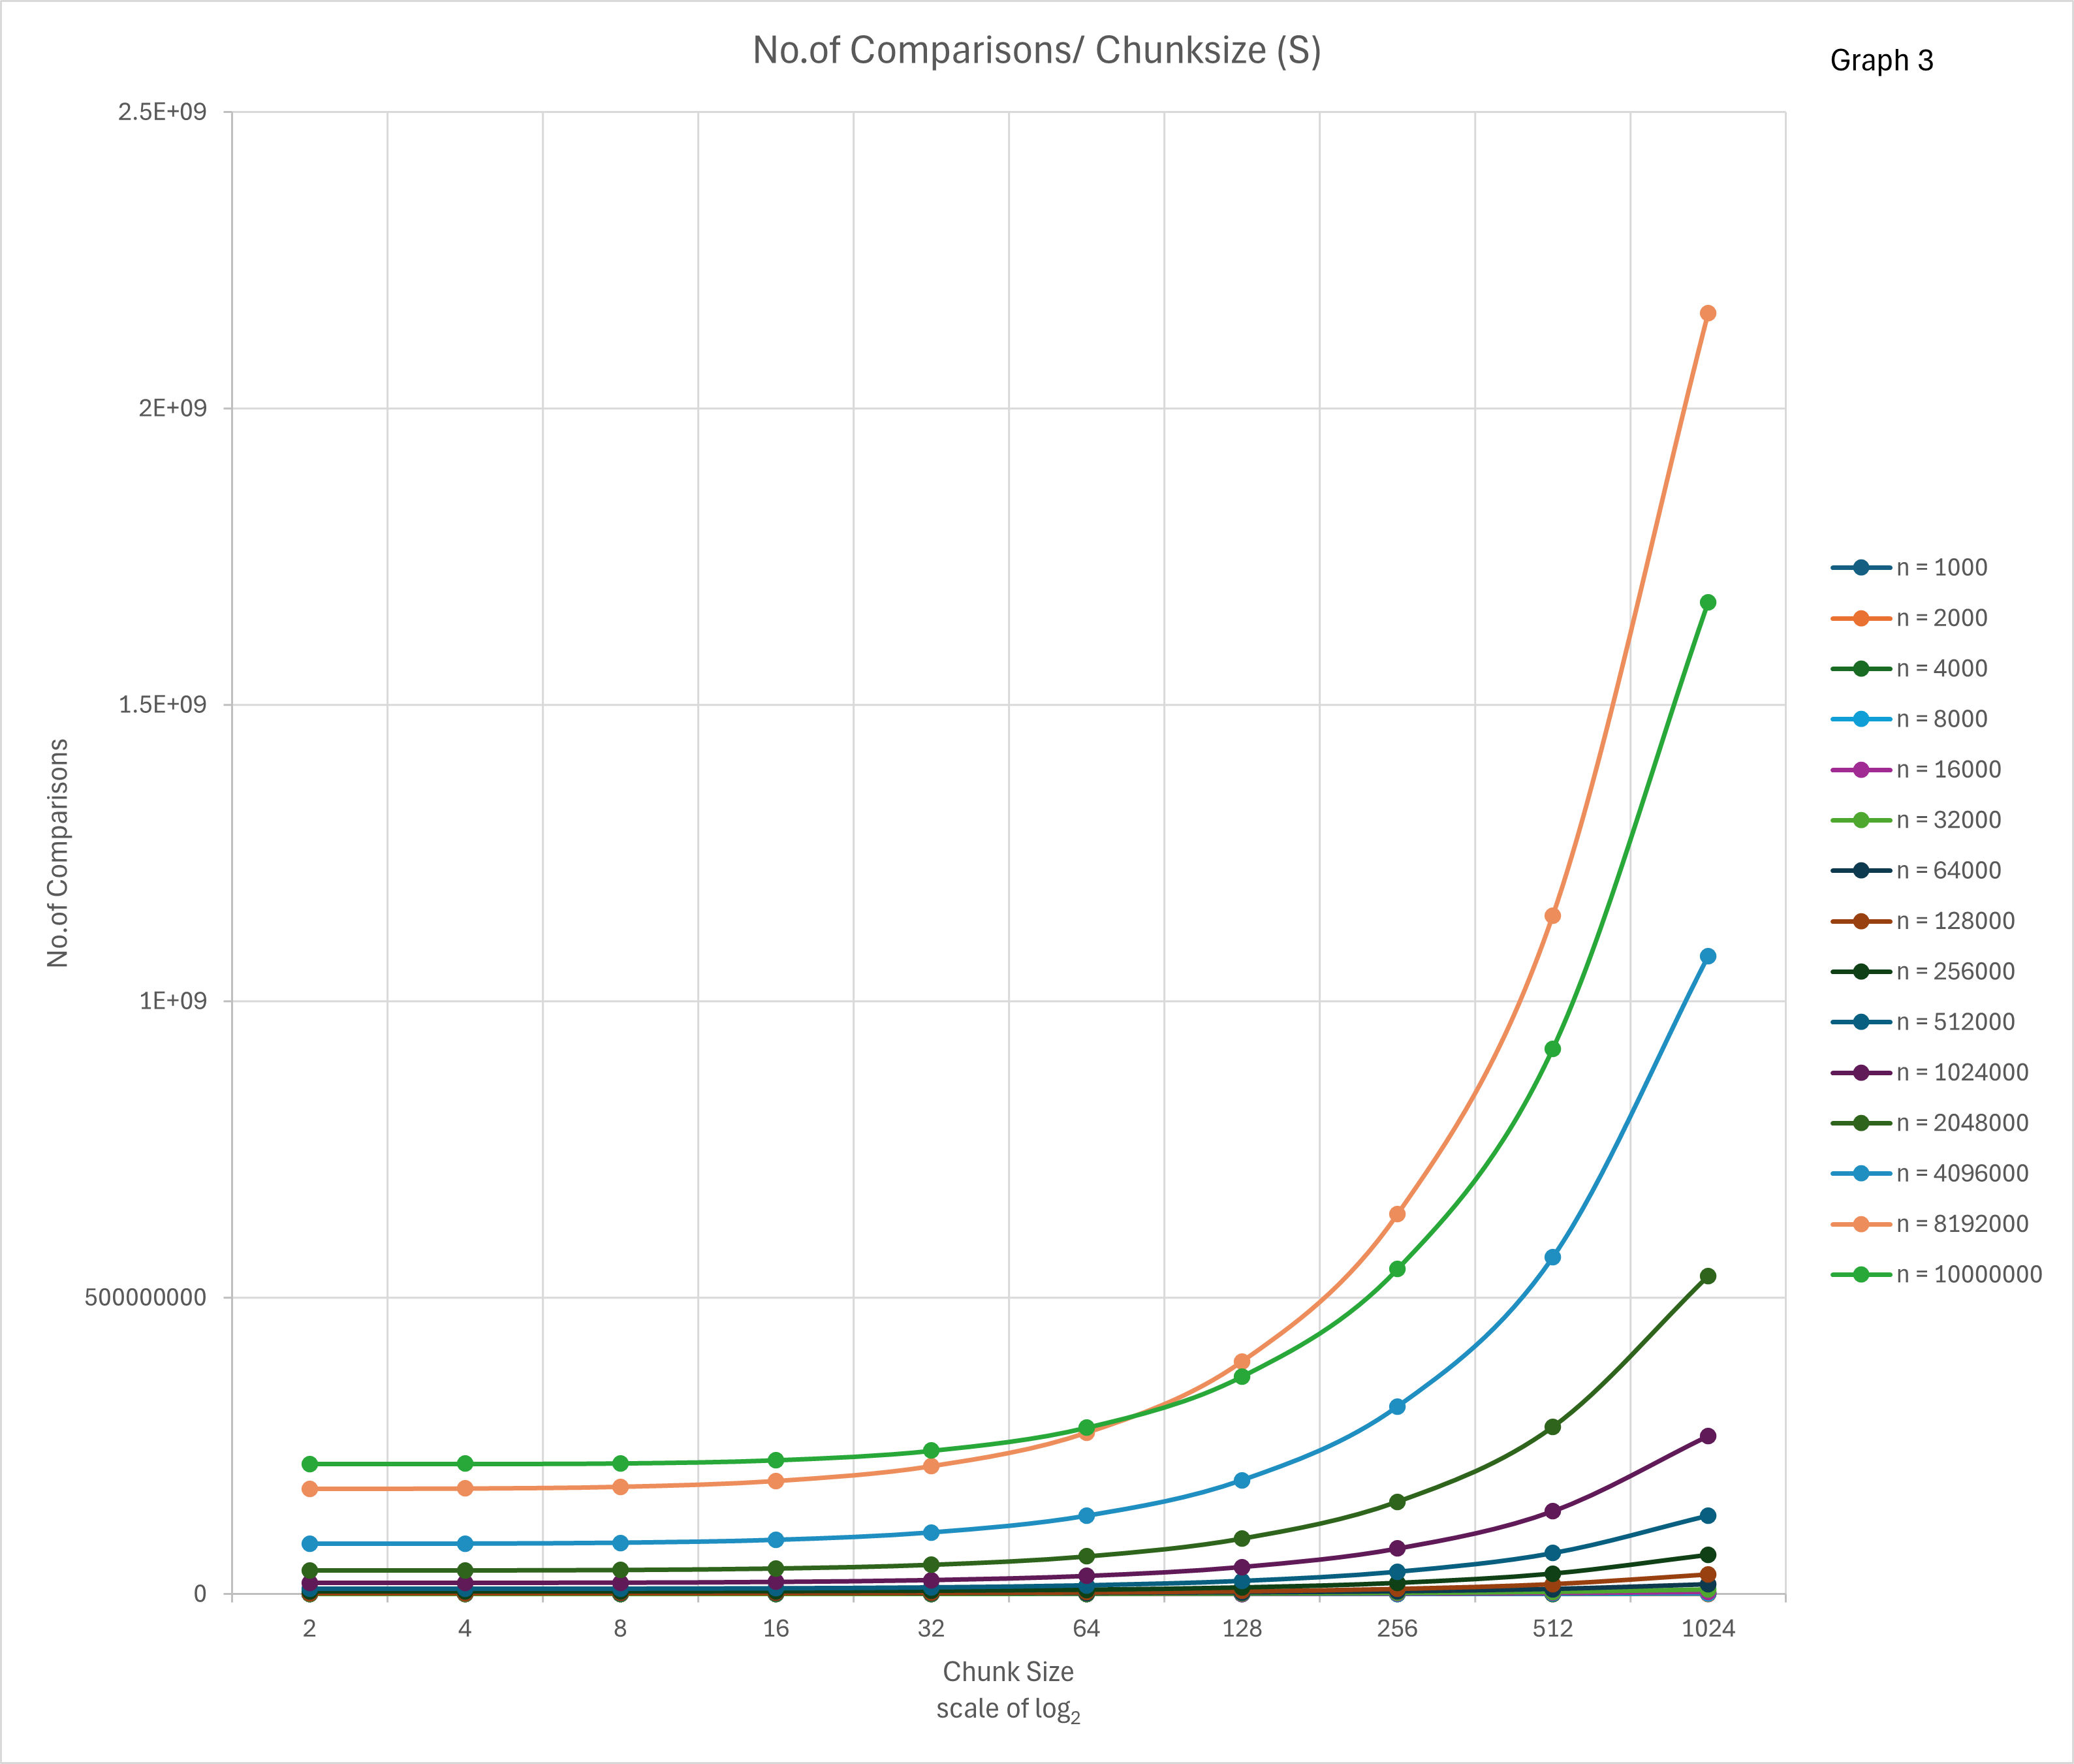

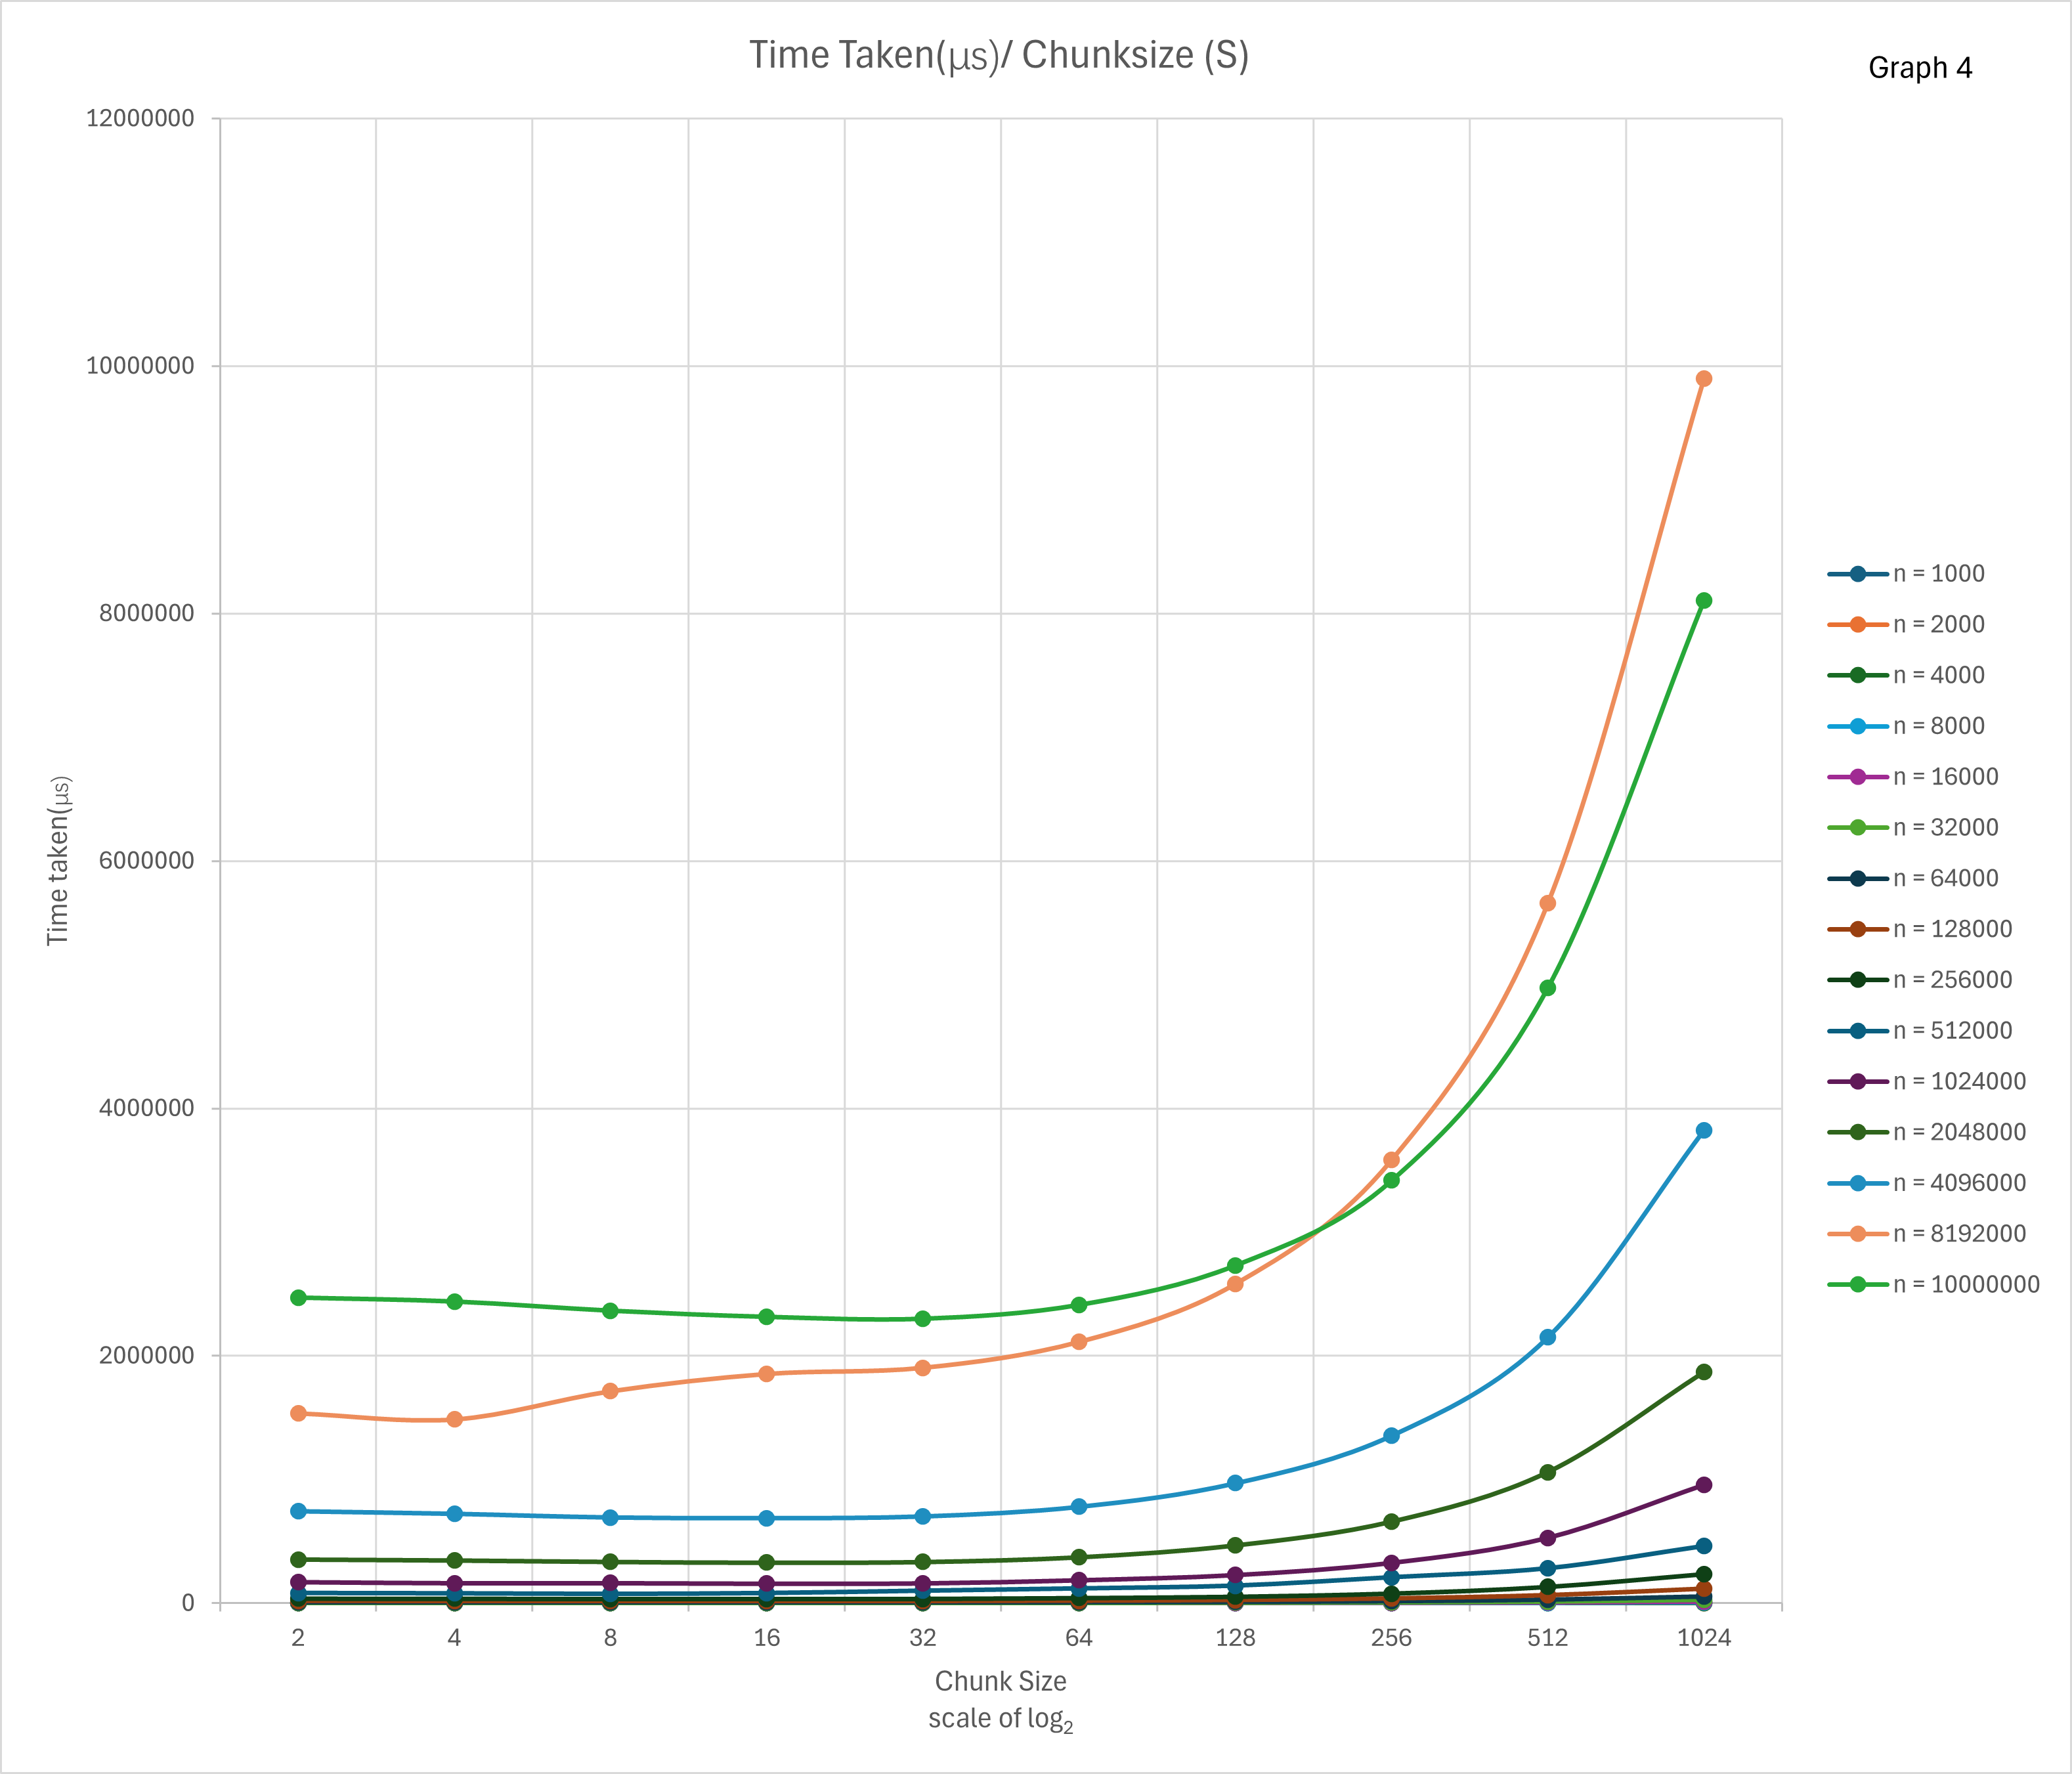

## Empirical Observations

### General Trend
For small values of S (2,4,8), the number of comparisons is relatively low and stable.  
As S increases, beyond 16-32, the curves start upwards.  
The Cost (number of Comparisons), rises sharply for very large values of S.  
This matches the Theoretical Analysis of hybridSort() as the logarithmic portion dominates at small S and the insertion term dominates at large S.  
Additionally, larger values of n lie higher on the plot. For e.g. n = 8192000 rises the fastest. This is to be expected because both the merge and insertion terms scale directly with n.

---



## How to Determine an Optimal Value of S

In order to determine the optimal value of S, we have to look at it's performance metric, however the graph grows exponentially at around chunk size 32, making it extremely hard to see small changes at lower chunk sizes. In order to see these changes, we scaled the graphs to only compare up to chunk size 32 (chunk sizes above 32 are slower anyway)

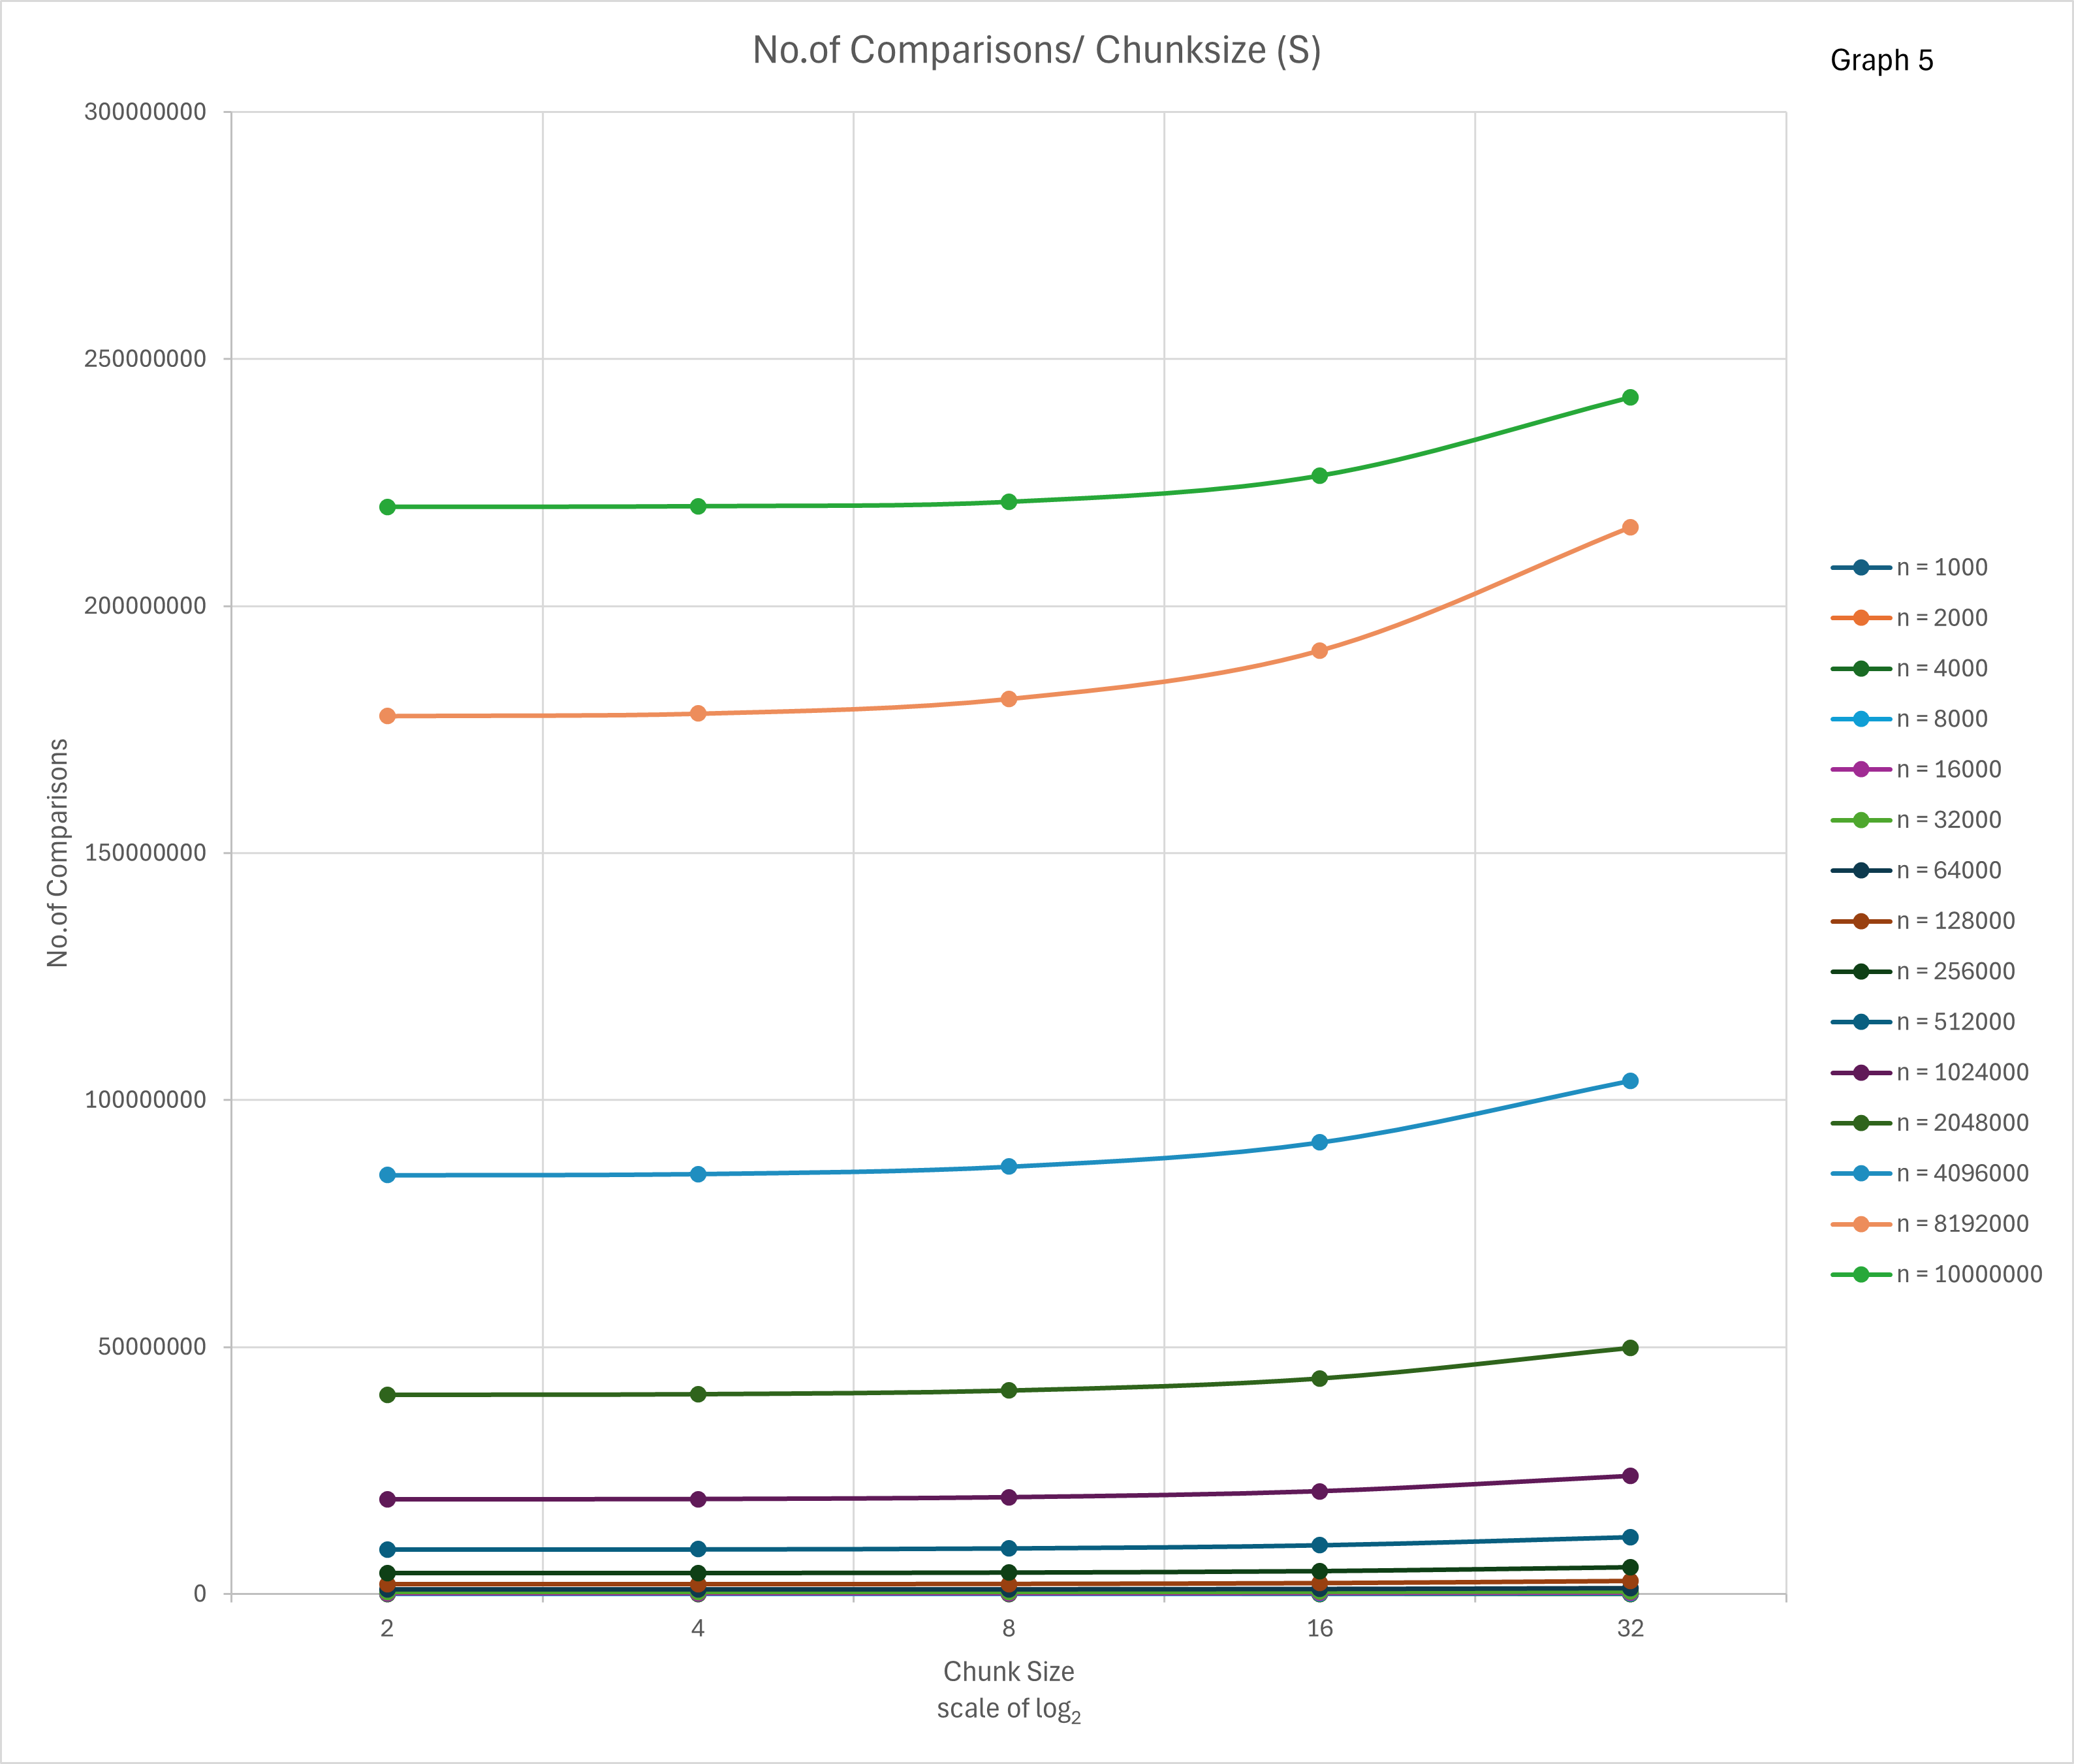

From this graph, we are able to tell comparison count increases as chunk size increases, however this is because comparison count does not take into account recursion overhead. In order to determine the true optimal S, we have to take a look at the execution time.

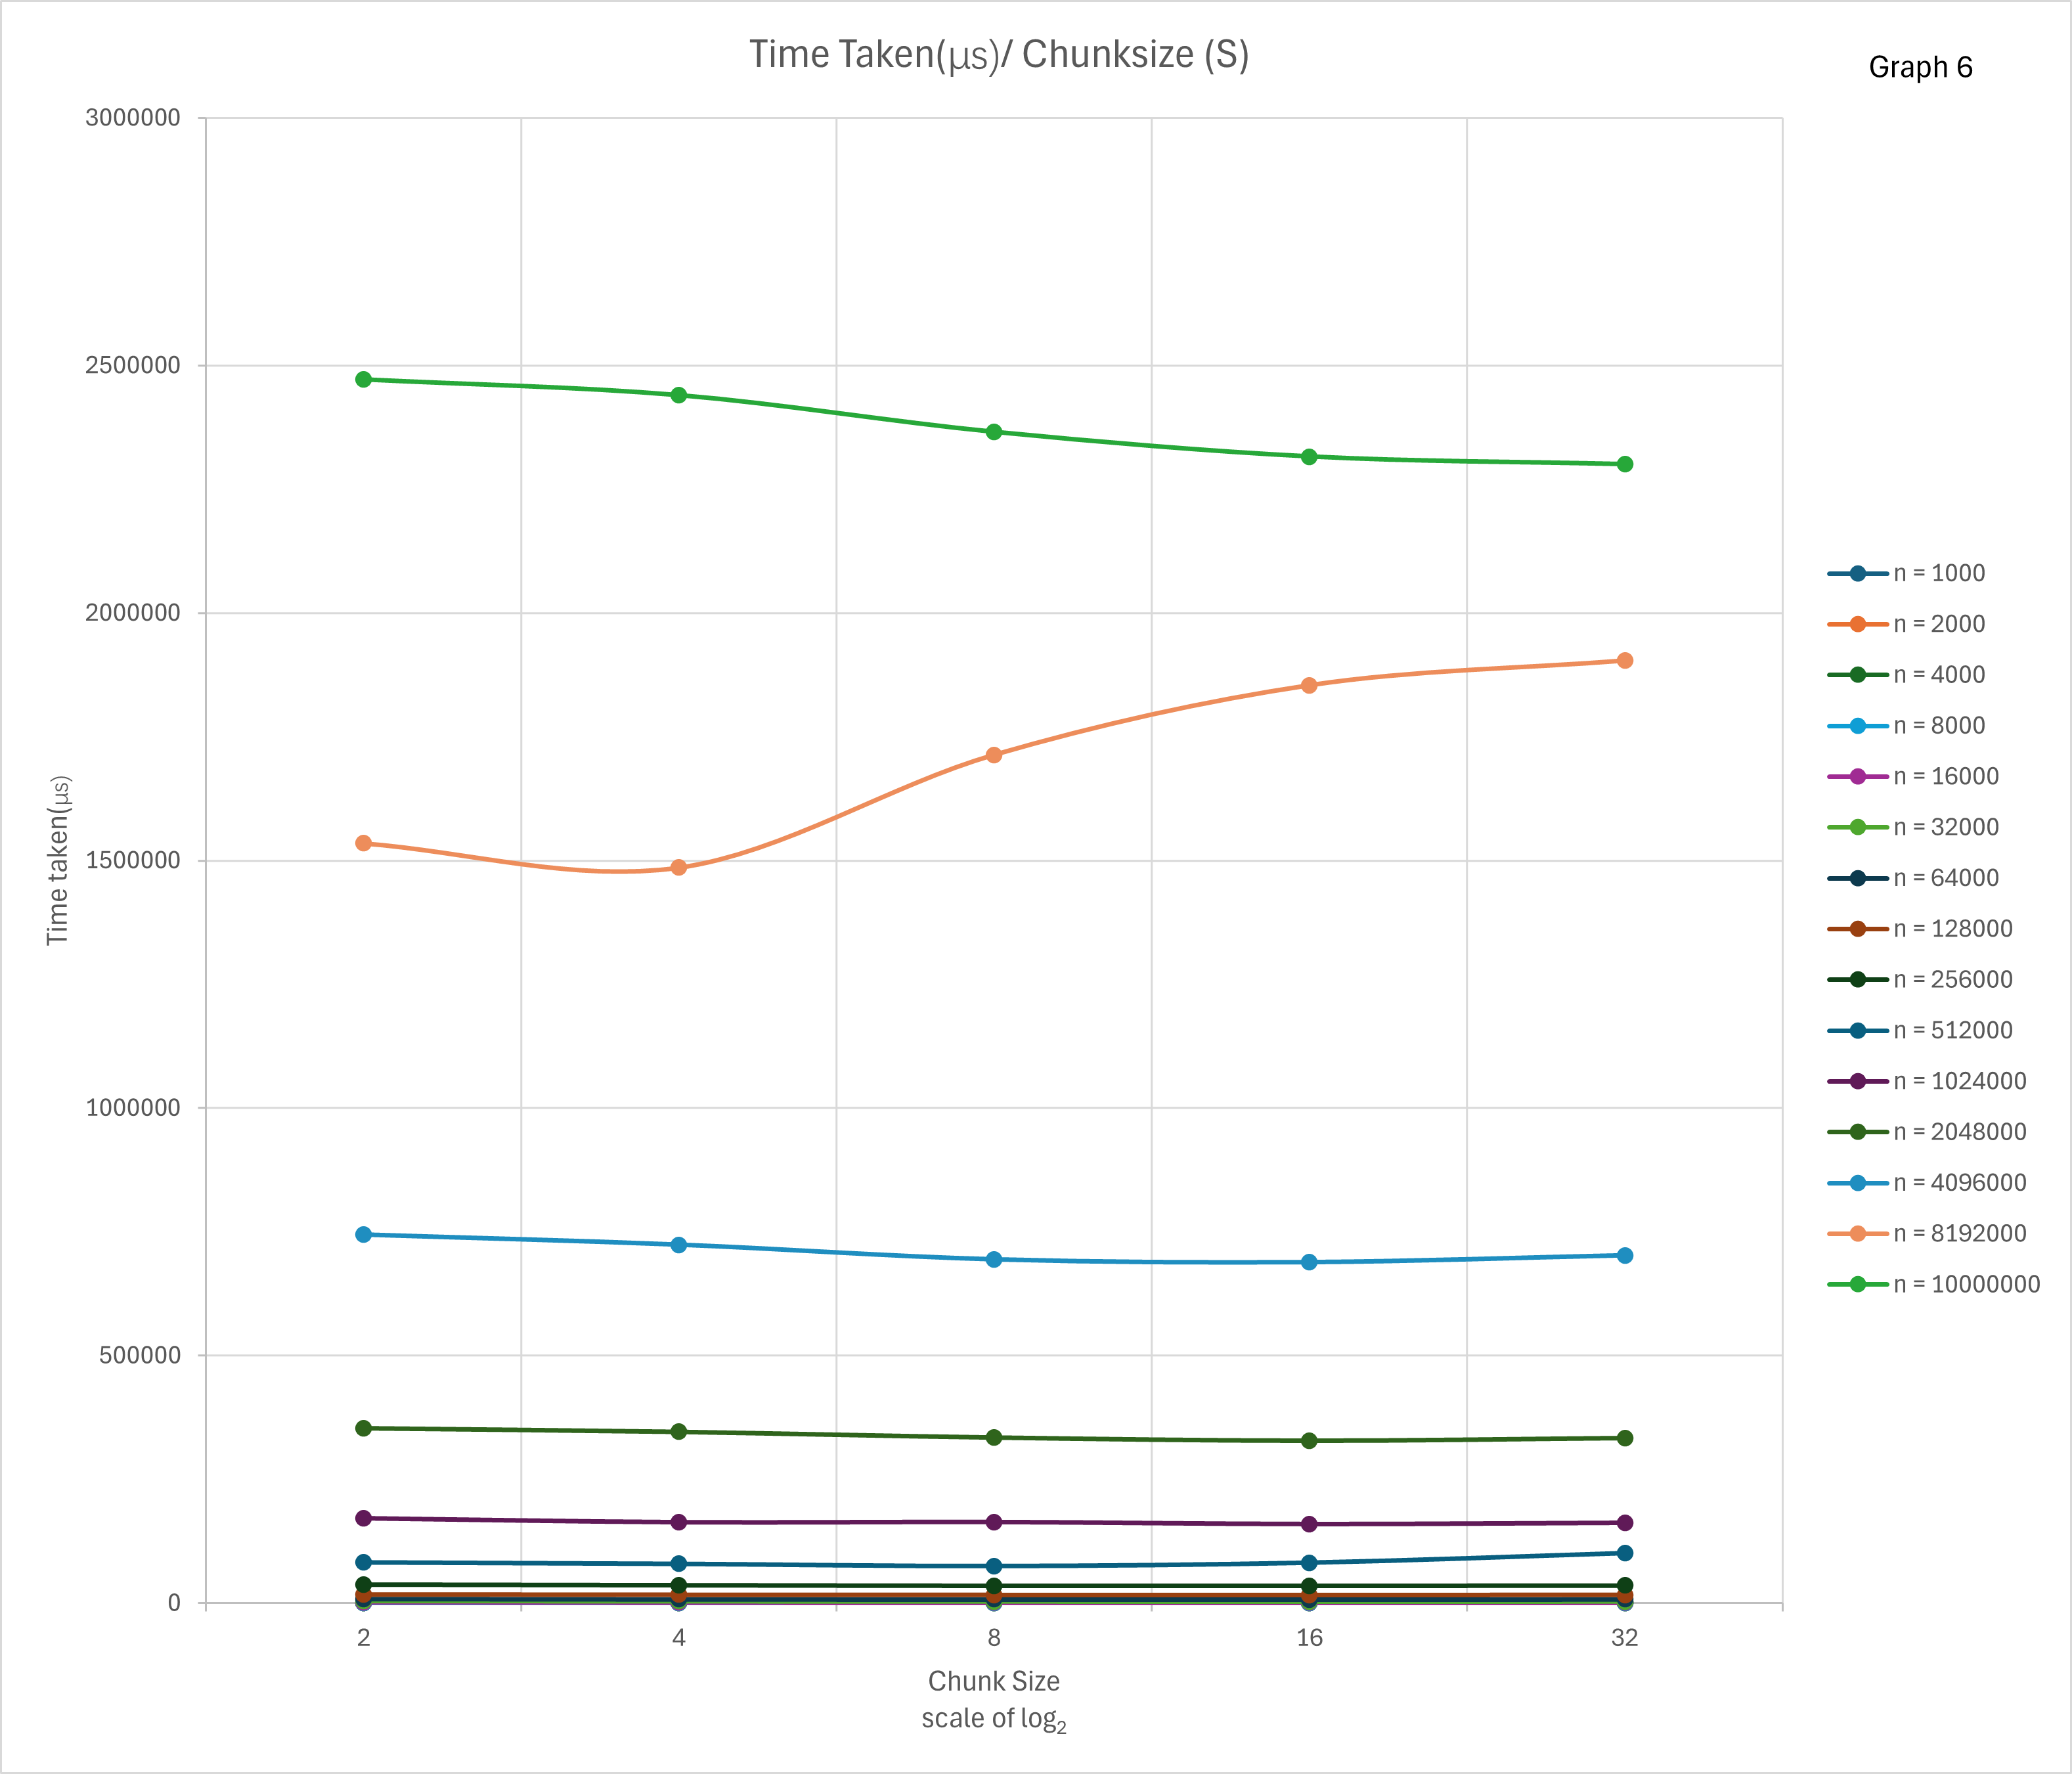

Here we can see, aside from the anomaly where n=8192000, the lines all follow a pretty similar trend and that the optimal chunk size is around 8 to 32. We can see that the optimal chunk sizes are larger for larger data sizes. It can also be seen that the chunk sizes effect are more prominent on larger array as seen by the steeper slopes in larger arrays.

##Results and Benchmarking

### Recursive MergeSort (ChunkSize = 1)

| Data Length (n) | Chunk Size (S) | Time (µs) | Comparison Count |
|-----------------|----------------|-----------|------------------|
| 1,000           | 1              | 71        | 8,700            |
| 2,000           | 1              | 139       | 19,424           |
| 4,000           | 1              | 465       | 42,818           |
| 8,000           | 1              | 864       | 93,694           |
| 16,000          | 1              | 1,968     | 203,396          |
| 32,000          | 1              | 3,961     | 438,850          |
| 64,000          | 1              | 8,459     | 941,376          |
| 128,000         | 1              | 17,608    | 2,010,529        |
| 256,000         | 1              | 38,552    | 4,276,938        |
| 512,000         | 1              | 79,625    | 9,065,548        |
| 1,024,000       | 1              | 166,212   | 19,154,632       |
| 2,048,000       | 1              | 349,870   | 40,355,995       |
| 4,096,000       | 1              | 727,849   | 84,808,606       |
| 8,192,000       | 1              | 1,977,143 | 177,806,984      |
| 10,000,000      | 1              | 2,458,721 | 220,097,721      |

### Iterative HybridSort (n = 10,000,000)

| Chunk Size (S) | Time (µs) | Comparisons   |
|----------------|-----------|---------------|
| 2              | 2,104,685 | 224,000,491   |
| 4              | 2,033,883 | 224,623,949   |
| 8              | 2,017,072 | 228,438,336   |
| 16             | 2,027,273 | 240,842,273   |
| 32             | 2,131,586 | 272,292,865   |
| 64             | 2,373,178 | 343,110,219   |
| 128            | 2,985,846 | 493,567,690   |
| 256            | 4,277,039 | 803,843,569   |
| 512            | 6,892,575 | 1,434,149,692 |
| 1024           | 12,225,080| 2,704,268,994 |

### Recursive HybridSort (n = 10,000,000)

| Chunk Size (S) | Time (µs) | Comparisons   |
|----------------|-----------|---------------|
| 2              | 2,471,496 | 220,097,721   |
| 4              | 2,439,806 | 220,218,354   |
| 8              | 2,365,747 | 221,103,555   |
| 16             | 2,316,149 | 226,404,499   |
| 32             | 2,300,495 | 242,304,553   |
| 64             | 2,412,913 | 281,237,726   |
| 128            | 2,731,471 | 367,396,636   |
| 256            | 3,417,639 | 548,456,616   |
| 512            | 4,976,236 | 920,035,727   |
| 1024           | 8,107,472 | 1,672,873,072 |

# Iterative Hybrid Sort
## Motivation
While the recursive Hybrid Sort is indeed faster than the normal Merge Sort, one of the main drawbacks of Merge Sort that isn't rectified in the recursive Hybrid Sort is that it's rooted in recursion.

Every recursive call takes some time and memory for the computer to put the function call into the function call stack. For our recursive Hybrid Sort algorithm, the number of recursive calls is lower bounded by $2 \cdot (n / S) - 1$ (there are at least $n / S$ leaves in the binary recursion tree).

## Algorithm
In order to solve this issue, we decided to implement the Hybrid Sort algorithm "in reverse":
1. Split the array into blocks of length $S$. The last block can be of size $< S$.
2. Run Insertion Sort on each block.
3. Pass through the array, merge pairs of adjacent blocks to get runs of length $2 \cdot S$. If there are odd number of blocks, keep the last block untouched.
4. Pass through the array, merge pairs of adjacent runs of length $2 \cdot S$ to get runs of length $4 \cdot S$, and so on, doubling the run size each pass. Stop the algorithm when there's only 1 run (of size $n$) remaining.

Correctness is trivial: we first create sorted runs of size $\le S$, and each merge pass preserves sortedness, so after enough passes the whole array is one sorted run.

## Complexity Analysis
We analyse the complexity in 2 phases:
### 1. Insertion Sort
There are $\lceil n / S \rceil$ blocks, each blocks has $O(S^2)$ complexity worst-case, so complexity for the Insertion Sort component is $O(n \cdot S)$.

### 2. Merging Phase
There are $\lceil \log_2 \lceil n / S \rceil \rceil$ merging runs, each pass iterates each element exactly once, therefore, complexity for the Merging component is $O(n \cdot \log_2 (n / S))$.

So overall, time complexity for our iterative Hybrid Sort algorithm is $O(n \cdot S + n \cdot log_2 (n / S))$.

## Implementation

In [ ]:
#include "iterative_hybrid_sort.hpp"
#include <cstring>
#include <algorithm>
using namespace std::chrono;

Result iterativeHybridSort(int S, int n, std::vector<CountableInt>& a) {
    std::vector<CountableInt> b(n);
    memcpy(b.data(), a.data(), n * sizeof(CountableInt));
    CountableInt* pa = a.data();
    CountableInt* pb = b.data();
    auto start = high_resolution_clock::now();
    for (int l = 0; l < n; l += S) {
        int r = std::min(l + S, n);
        CountableInt key;
        for (int i = l + 1; i < r; ++i) {
            key = pa[i];
            int j = i - 1;
            while (j >= l && pa[j] > key) {
                pa[j + 1] = pa[j];
                --j;
            }
            pa[j + 1] = key;
        }
    }
    for (size_t width = S; width < (size_t)n; width *= 2) {
        for (size_t l = 0; l < (size_t)n; l += 2 * width) {
            size_t r = std::min(l + 2 * width, (size_t)n);
            size_t m = std::min(l + width, (size_t)n);
            if (r == m) {
                memcpy(pb + l, pa + l, (r - l) * sizeof(CountableInt));
                continue;
            }
            size_t i = l, j = m, k = l;
            while (i < m && j < r) {
                if (pa[i] <= pa[j]) pb[k++] = pa[i++];
                else pb[k++] = pa[j++];
            }
            if (i < m) memcpy(pb + k, pa + i, (m - i) * sizeof(CountableInt));
            if (j < r) memcpy(pb + k, pa + j, (r - j) * sizeof(CountableInt));
        }
        std::swap(pa, pb);
    }
    if (pa != a.data()) memcpy(a.data(), pa, n * sizeof(CountableInt));
    auto end = high_resolution_clock::now();
    auto elapsedMicroseconds = duration_cast<microseconds>(end - start).count();
    return Result{ static_cast<int>(elapsedMicroseconds), comparisonCount };
}

## Exception



An interesting detail can be seen in the **10 million input size benchmarks**. Both Graph s below show a slight dip at this point. This deviation is **intentional**, as 10 million is not a power of two times S and results in uneven partitioning of subarrays during recursive splitting. When the input size increases to **16 million elements (2^24)**, the partitioning becomes even again, and the expected trend resumes smoothly.  



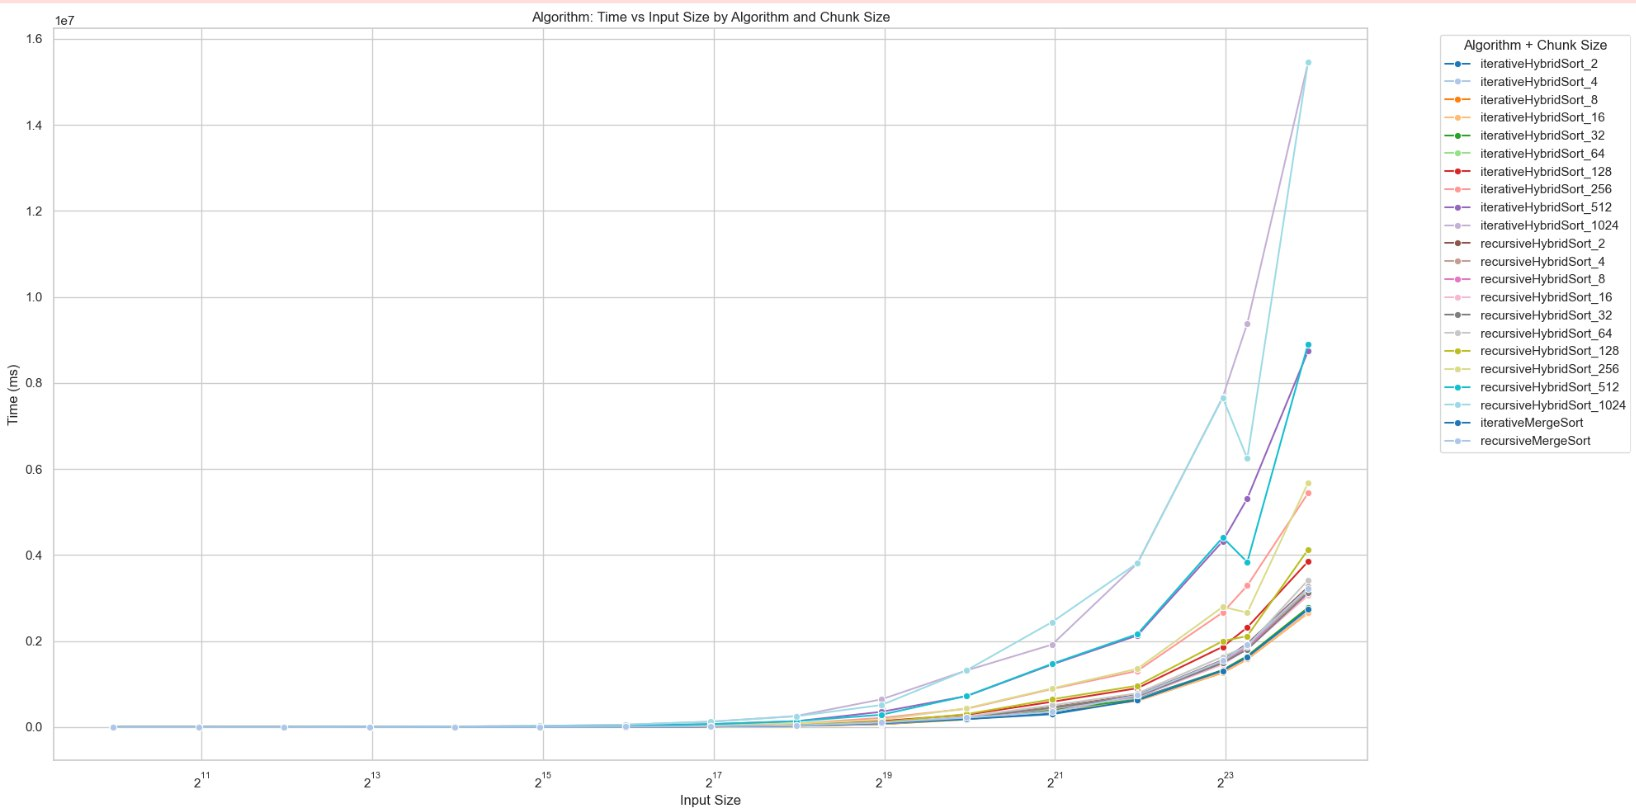

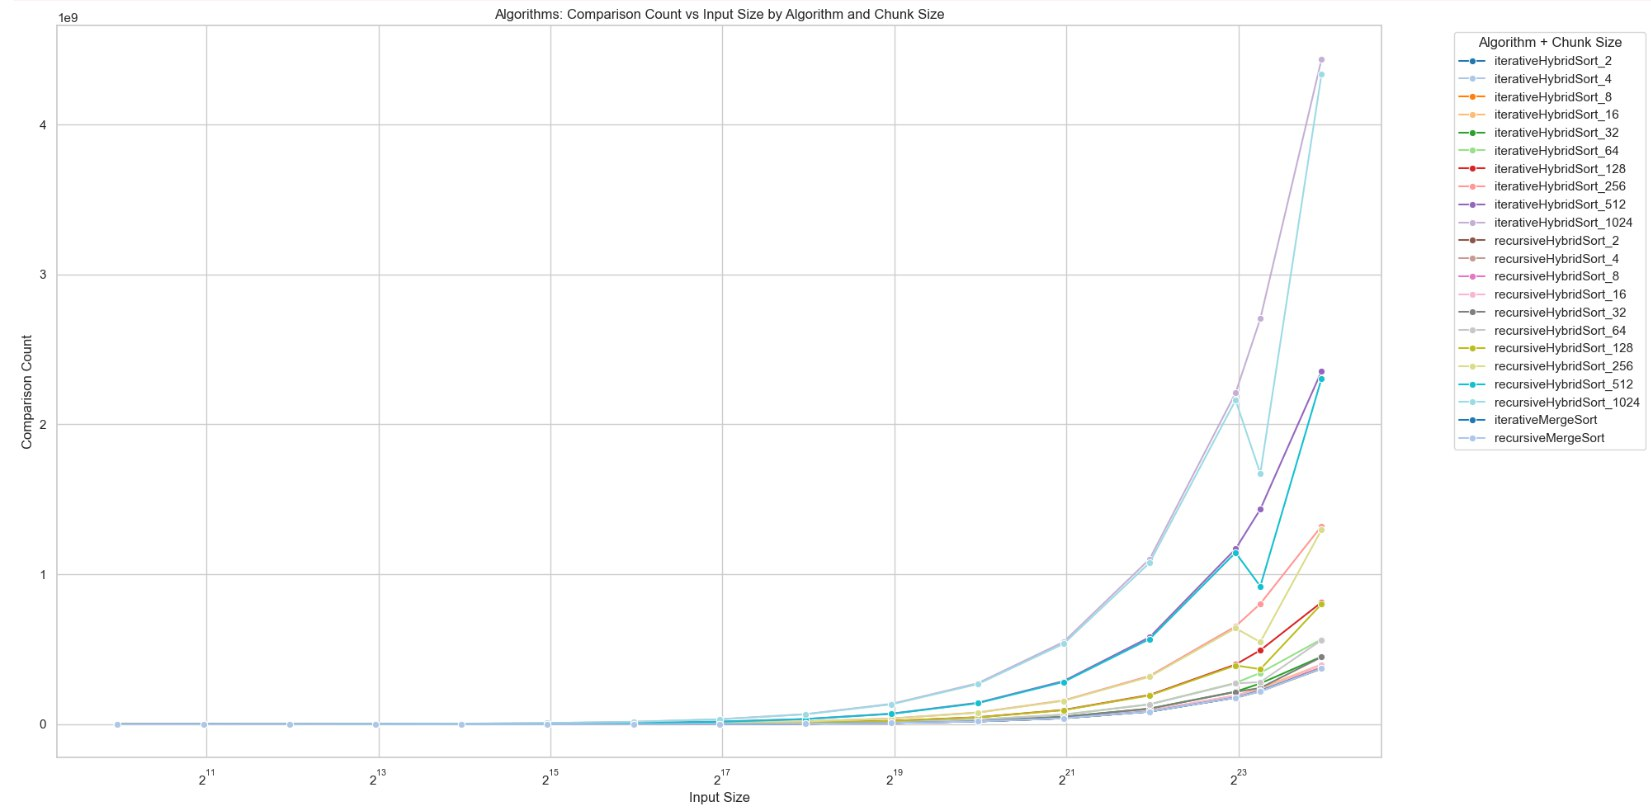

## Discussion: How HybridSort Works (Iterative & Recursive)

### What HybridSort Is
HybridSort combines **MergeSort** with **Insertion Sort** using a cutoff **S**:
- Large subarrays are handled by **merges**.
- Small subarrays (size ≤ S) are sorted by **insertion sort** .

This yields the practical complexity:

$$
T(n, S) = \Theta\big(n \log\frac{n}{S}\big) + \Theta(nS)
$$

which balances recursion depth against the cost of finishing small runs.

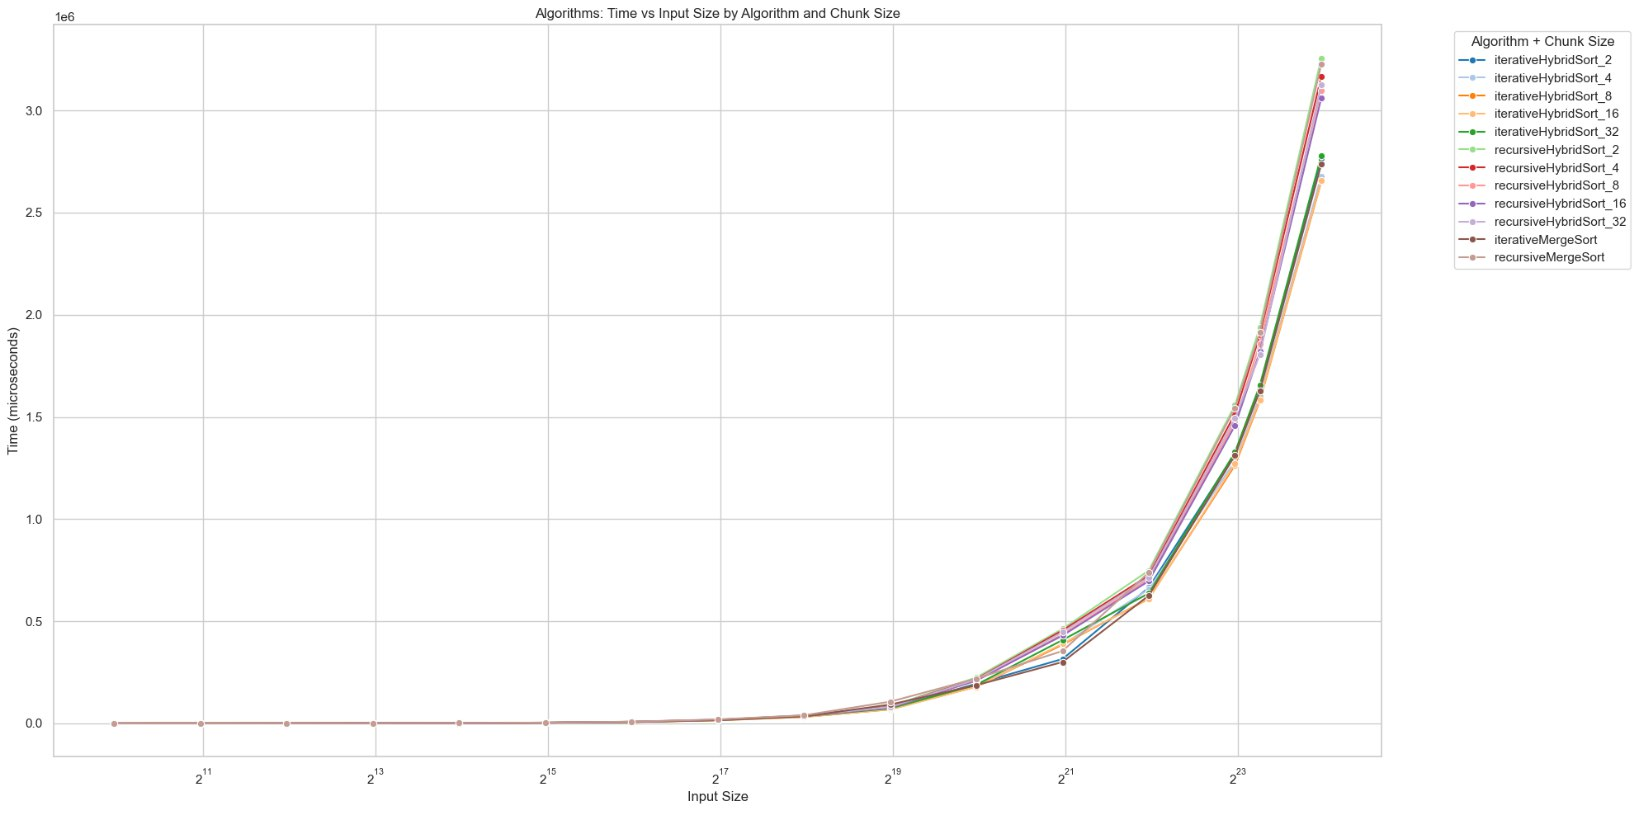

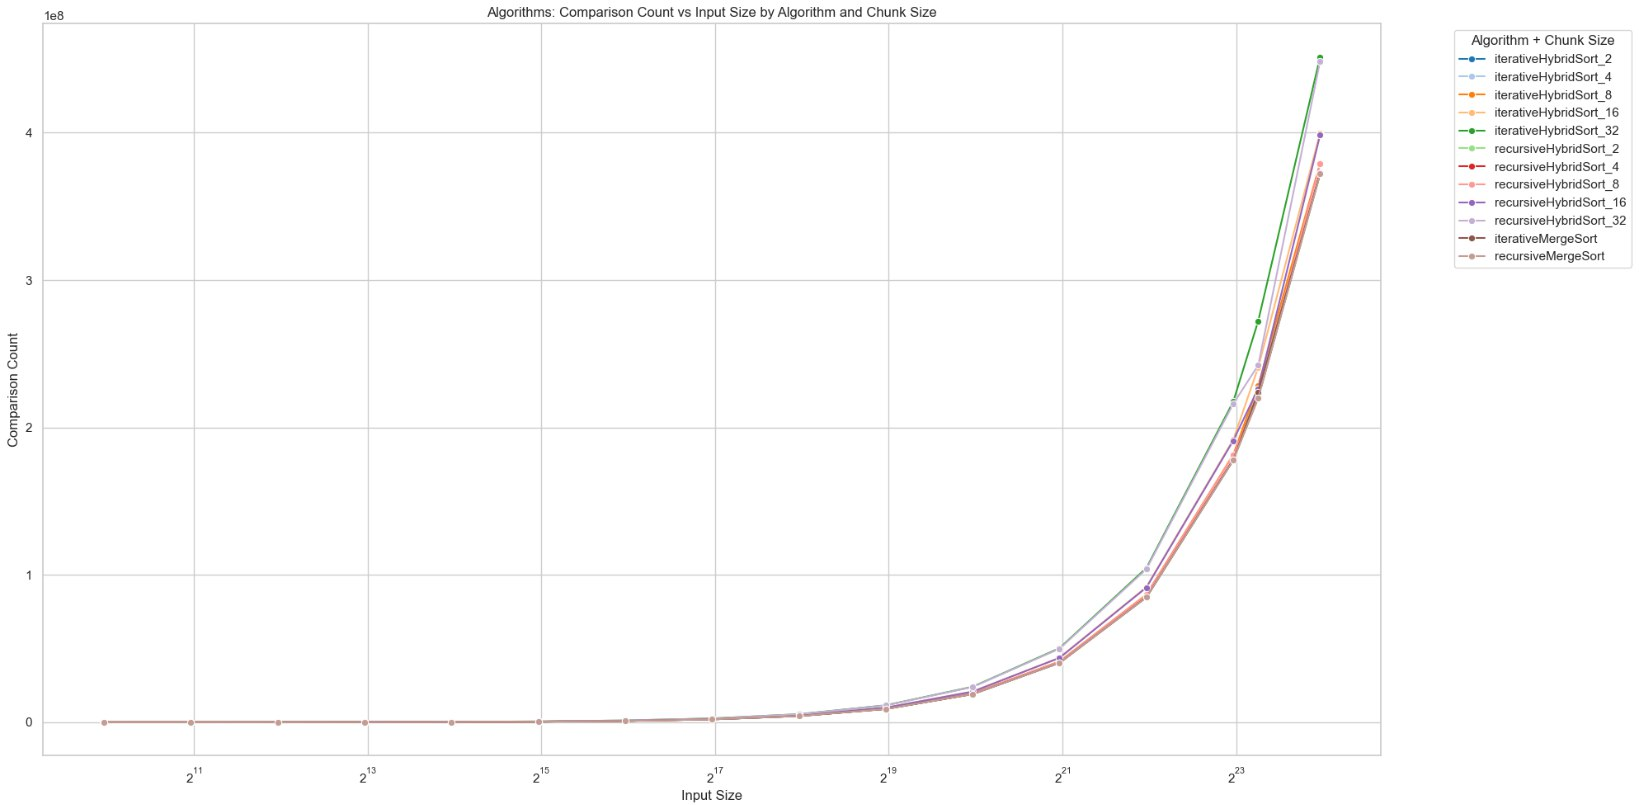

## Conclusion

This project investigated the performance of HybridSort, which combines mergeSort with insertionSort based on a tunable threshold S. Through theoretical analysis and empirical benchmarking on datasets up to 16 million elements, we established the following:  
HybridSort follows the complexity Θ(n log(n/S) + nS).  
- The empirical results confirmed this trend, with curves displaying the expected U-shape as S increases.  
- The optimal value of S was consistently found to be around **S = 8 to 32**, providing the lowest number of comparisons and fastest execution.  
- HybridSort demonstrates clear improvements over pure mergeSort, especially at scale, validating why hybrid sorting techniques are used in real-world libraries.  

In conclusion, HybridSort provides a robust and efficient sorting approach that balances theoretical guarantees with practical performance.

##Appendix A: Codebase

https://github.com/IAmGreyBunny/SC2001-Labs/tree/main/Lab%201

##Appendix B: Supplementary excel files


 Run the code segment to download raw data for the different algorithms.

In [ ]:
from google.colab import files

files.download('/content/SortingAlgoResults.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>